In [1]:
import torch
from transformers import AutoModelForMaskedLM, AutoTokenizer, pipeline

/home/sagemaker-user/portuguese-modernbert/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("ricardoz/BERTugues-base-portuguese-cased")

print("Special tokens and their IDs:")
print(f"pad_token: {tokenizer.pad_token} - ID: {tokenizer.pad_token_id}")
print(f"cls_token: {tokenizer.cls_token} - ID: {tokenizer.cls_token_id}")
print(f"sep_token: {tokenizer.sep_token} - ID: {tokenizer.sep_token_id}")
print(f"mask_token: {tokenizer.mask_token} - ID: {tokenizer.mask_token_id}")
print(f"unk_token: {tokenizer.unk_token} - ID: {tokenizer.unk_token_id}")

# Para ver todos os tokens especiais juntos:
print("\nAll special tokens dictionary:")
print(tokenizer.special_tokens_map)

Special tokens and their IDs:
pad_token: [PAD] - ID: 0
cls_token: [CLS] - ID: 2
sep_token: [SEP] - ID: 3
mask_token: [MASK] - ID: 4
unk_token: [UNK] - ID: 1

All special tokens dictionary:
{'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}


In [9]:
model = AutoModelForMaskedLM.from_pretrained("answerdotai/ModernBERT-base")
# model = AutoModelForMaskedLM.from_pretrained("chandar-lab/NeoBERT")

print("Special tokens IDs from the model config:")
print(f"pad_token_id: {model.config.pad_token_id}")
print(f"cls_token_id: {model.config.cls_token_id}")
print(f"sep_token_id: {model.config.sep_token_id}")
# print(f"mask_token_id: {model.config.mask_token_id}")
print(f"bos_token_id: {model.config.bos_token_id}")  # início de sequência (se aplicável)
print(f"eos_token_id: {model.config.eos_token_id}")  # fim de sequência (se aplicável)


Flash Attention 2 only supports torch.float16 and torch.bfloat16 dtypes, but the current dype in ModernBertForMaskedLM is torch.float32. You should run training or inference using Automatic Mixed-Precision via the `with torch.autocast(device_type='torch_device'):` decorator, or load the model with the `torch_dtype` argument. Example: `model = AutoModel.from_pretrained("openai/whisper-tiny", attn_implementation="flash_attention_2", torch_dtype=torch.float16)`
Flash Attention 2 only supports torch.float16 and torch.bfloat16 dtypes, but the current dype in ModernBertModel is torch.float32. You should run training or inference using Automatic Mixed-Precision via the `with torch.autocast(device_type='torch_device'):` decorator, or load the model with the `torch_dtype` argument. Example: `model = AutoModel.from_pretrained("openai/whisper-tiny", attn_implementation="flash_attention_2", torch_dtype=torch.float16)`


Special tokens IDs from the model config:
pad_token_id: 50283
cls_token_id: 50281
sep_token_id: 50282
bos_token_id: 50281
eos_token_id: 50282


In [3]:
model_path_modernbert = "checkpoints_v2/ckpt-199999"  # caminho local onde seu modelo foi salvo
model_path_bertimbau = "neuralmind/bert-base-portuguese-cased"  # caminho local onde seu modelo foi salvo
# model_path = "chandar-lab/NeoBERT"

# model = AutoModelForMaskedLM.from_pretrained(model_path, torch_dtype=torch.bfloat16)
# tokenizer = AutoTokenizer.from_pretrained(model_path)
pipe_modernbert = pipeline(task="fill-mask", model=model_path_modernbert)
pipe_bertimbau = pipeline(task="fill-mask", model=model_path_bertimbau)

Device set to use cuda:0
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


In [4]:
model.get_input_embeddings().num_embeddings

NameError: name 'model' is not defined

In [7]:
frase = "Eu sou muito [MASK]. Recebi minha certificação hoje."
print("ModernBERT")
pipe_modernbert(frase)

ModernBERT


[{'score': 0.515625,
  'token': 10907,
  'token_str': 'feliz',
  'sequence': 'eu sou muito feliz. recebi minha certificacao hoje.'},
 {'score': 0.048095703125,
  'token': 2844,
  'token_str': 'profissional',
  'sequence': 'eu sou muito profissional. recebi minha certificacao hoje.'},
 {'score': 0.0291748046875,
  'token': 1790,
  'token_str': 'bem',
  'sequence': 'eu sou muito bem. recebi minha certificacao hoje.'},
 {'score': 0.02001953125,
  'token': 1932,
  'token_str': 'especial',
  'sequence': 'eu sou muito especial. recebi minha certificacao hoje.'},
 {'score': 0.018798828125,
  'token': 2019,
  'token_str': 'novo',
  'sequence': 'eu sou muito novo. recebi minha certificacao hoje.'}]

In [8]:
print("BERTimbau")
pipe_bertimbau(frase)

BERTimbau


[{'score': 0.1939350962638855,
  'token': 8540,
  'token_str': 'feliz',
  'sequence': 'Eu sou muito feliz. Recebi minha certificação hoje.'},
 {'score': 0.046809013932943344,
  'token': 4062,
  'token_str': 'bom',
  'sequence': 'Eu sou muito bom. Recebi minha certificação hoje.'},
 {'score': 0.04473944008350372,
  'token': 3264,
  'token_str': 'boa',
  'sequence': 'Eu sou muito boa. Recebi minha certificação hoje.'},
 {'score': 0.0285596065223217,
  'token': 21323,
  'token_str': 'humilde',
  'sequence': 'Eu sou muito humilde. Recebi minha certificação hoje.'},
 {'score': 0.02297813817858696,
  'token': 7103,
  'token_str': 'legal',
  'sequence': 'Eu sou muito legal. Recebi minha certificação hoje.'}]

In [ ]:
# model.push_to_hub("iara-project/test-modbert")
# tokenizer.push_to_hub("iara-project/test-modbert")

In [ ]:
import seaborn as sns
from modernbert_trainer.lr_scheduler import get_trapezoidal_lr, get_cosine_lr

In [ ]:
lr_list = []
for step in range(937500):
    lr = get_cosine_lr(
        step=step,
        max_steps=937500,
        base_lr=6e-4,
        warmup_pct=0.01,
        decay_pct=0.9,
        min_lr=1e-8
    )
    lr_list.append(lr)

<Axes: >

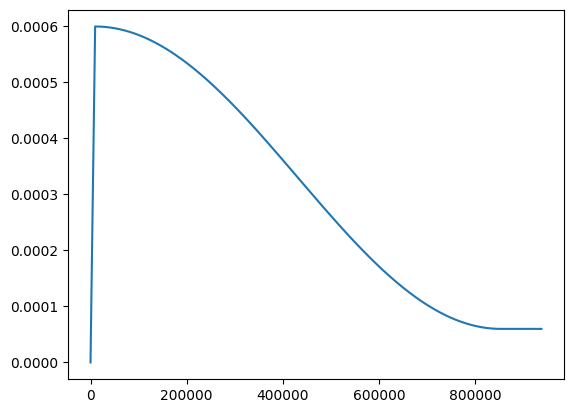

In [ ]:
sns.lineplot(x = list(range(937500)), y = lr_list)